# EDA

In [1]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from pandas.plotting import autocorrelation_plot

from scipy.stats import boxcox

In [472]:

# yf.pdr_override()

# ticker = 'VIX'
# start = '2010-01-01'
# end = '2020-12-31'
# df = web.get_data_yahoo(ticker, start, end)
# df = df['CLOSE']
# print(df.head())


First look at the data.

In [473]:
df = pd.read_csv('df5.csv', index_col=0)
df.head()

,CLOSE,Positive,Negative,Neutral,Total,summed_vader,sentiments,headlines,stocks,date,dayOfWeek,ave_vader,daily_sentiment,compound,overall_sentiment,Pos_minus_Neg
133,20.04,52,17,96,165,13.7954,"['Positive', ' Neutral', ' Neutral', ' Positiv...","Gold Gains Traction (GLD, GDX, IAG, NEM, ABX),...","['ABX', ' ACTG', ' AEIS', ' AEO', ' AEO', ' AF...",2010-01-04,Monday,0.083608,Positive,0.9982,Positive,35
134,19.35,84,15,103,202,34.1086,"['Neutral', ' Negative', ' Neutral', ' Positiv...",Advance Auto Parts – A Turnaround Candidate (A...,"['AAP', ' ACE', ' ACN', ' ACN', ' ADBE', ' AEO...",2010-01-05,Tuesday,0.168854,Positive,0.9997,Positive,69
135,19.16,74,8,86,168,23.6630,"['Neutral', ' Neutral', ' Positive', ' Positiv...","Insurance Sector Overview - 2010 (AGII, SBX, A...","['ACE', ' AEIS', ' AGQ', ' AKS', ' ALL', ' ARE...",2010-01-06,Wednesday,0.140851,Positive,0.9993,Positive,66
136,19.06,90,29,106,225,24.1130,"['Positive', ' Negative', ' Neutral', ' Negati...","Benzinga’s Top Downgrades (WEN, CMP, ACL, PPDI...","['ABC', ' ACN', ' AEO', ' AEO', ' AER', ' AET'...",2010-01-07,Thursday,0.107169,Positive,0.9986,Positive,61
137,18.13,80,26,111,217,16.3447,"['Negative', ' Neutral', ' Positive', ' Negati...",Gold Finishes Lower After Pressure from the Do...,"['ABX', ' AEO', ' AGU', ' AGU', ' AIB', ' AKS'...",2010-01-08,Friday,0.075321,Positive,0.9984,Positive,54


Make a line plot and histogram for the `CLOSE`

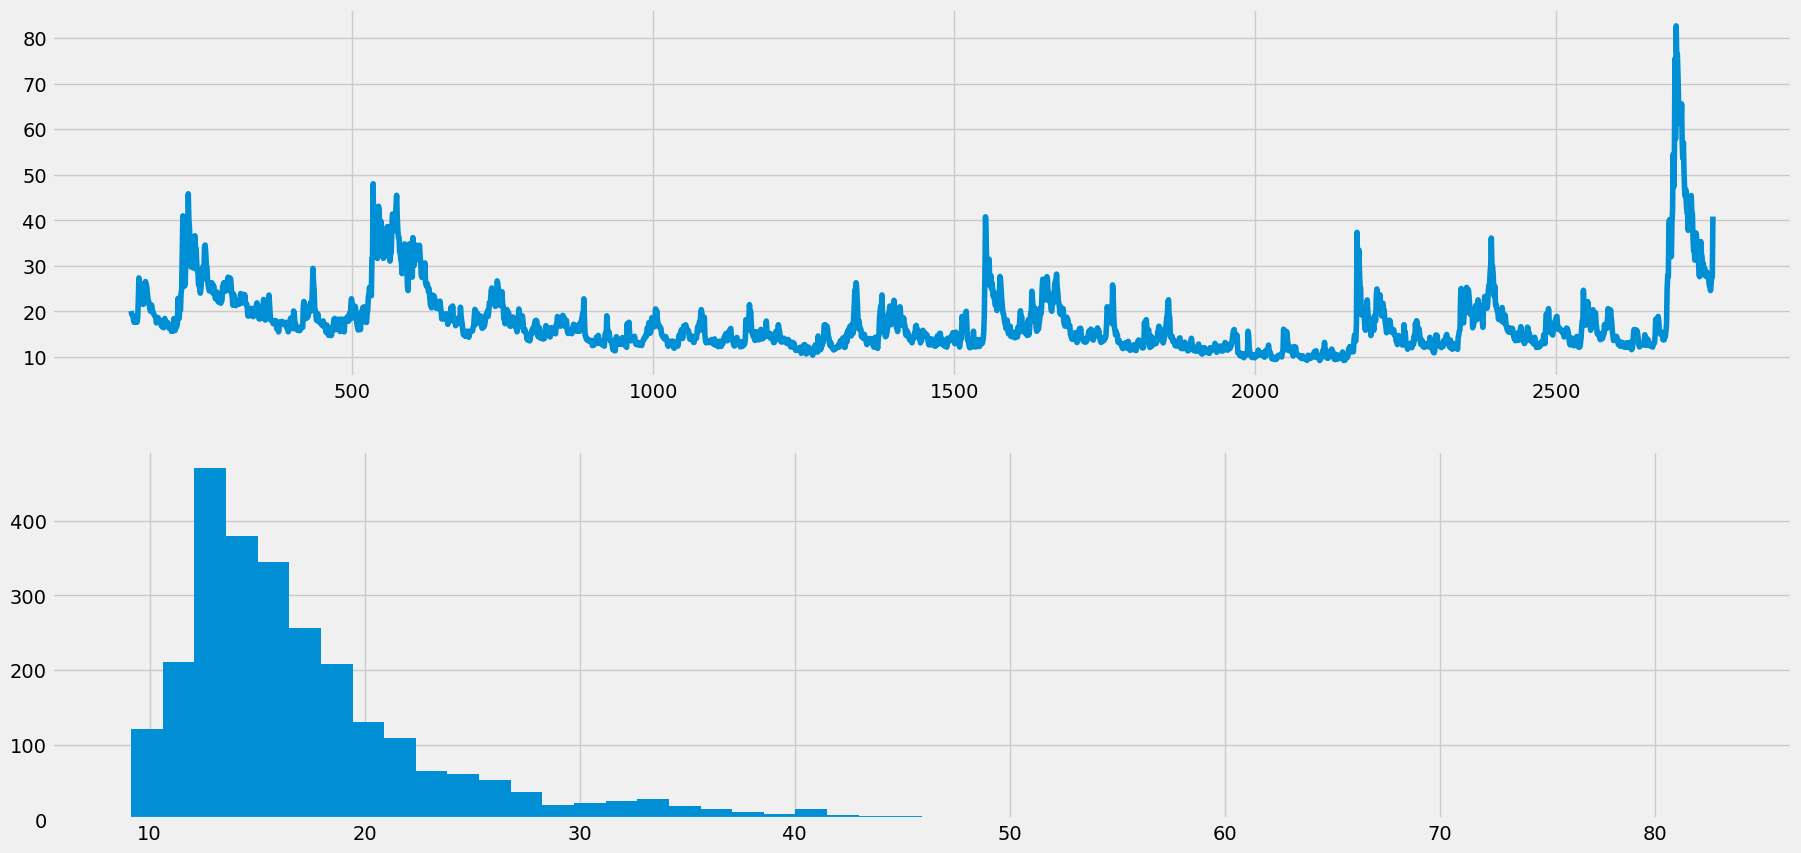

In [474]:
plt.figure(figsize = (20,10))
# line plot 
plt.subplot(211) 
plt.plot(df['CLOSE']) 
# histogram 
plt.subplot(212) 
plt.hist(df['CLOSE'], bins=50) 
plt.show()

In [475]:
values = pd.DataFrame(df['CLOSE'].values)
values.head()

,0
0,20.04
1,19.35
2,19.16
3,19.06
4,18.13


In [476]:
lags = 9
columns = [values] 
for i in range(1,(lags + 1)):
    columns.append(values.shift(i)) 
dataframe = pd.concat(columns, axis=1) 
columns = ['t']

In [477]:
columns

['t']

In [478]:

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))

In [479]:
dataframe.columns = columns

Create a dataframe with the `CLOSE` values and lags from 0 to 9

In [480]:
dataframe

,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9
0,20.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.35,20.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.16,19.35,20.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.06,19.16,19.35,20.04,NaN,NaN,NaN,NaN,NaN,NaN
4,18.13,19.06,19.16,19.35,20.04,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2623,24.52,25.81,25.66,26.84,28.23,27.51,28.59,27.62,28.01,28.16
2624,25.81,24.52,25.81,25.66,26.84,28.23,27.51,28.59,27.62,28.01
2625,27.57,25.81,24.52,25.81,25.66,26.84,28.23,27.51,28.59,27.62
2626,27.57,27.57,25.81,24.52,25.81,25.66,26.84,28.23,27.51,28.59


Make scatterplots for t vs the lags. Notice the level of correlation(as seen in the tight linear structure) drops off as the value(VIX close) increased and as the number of lags increases.

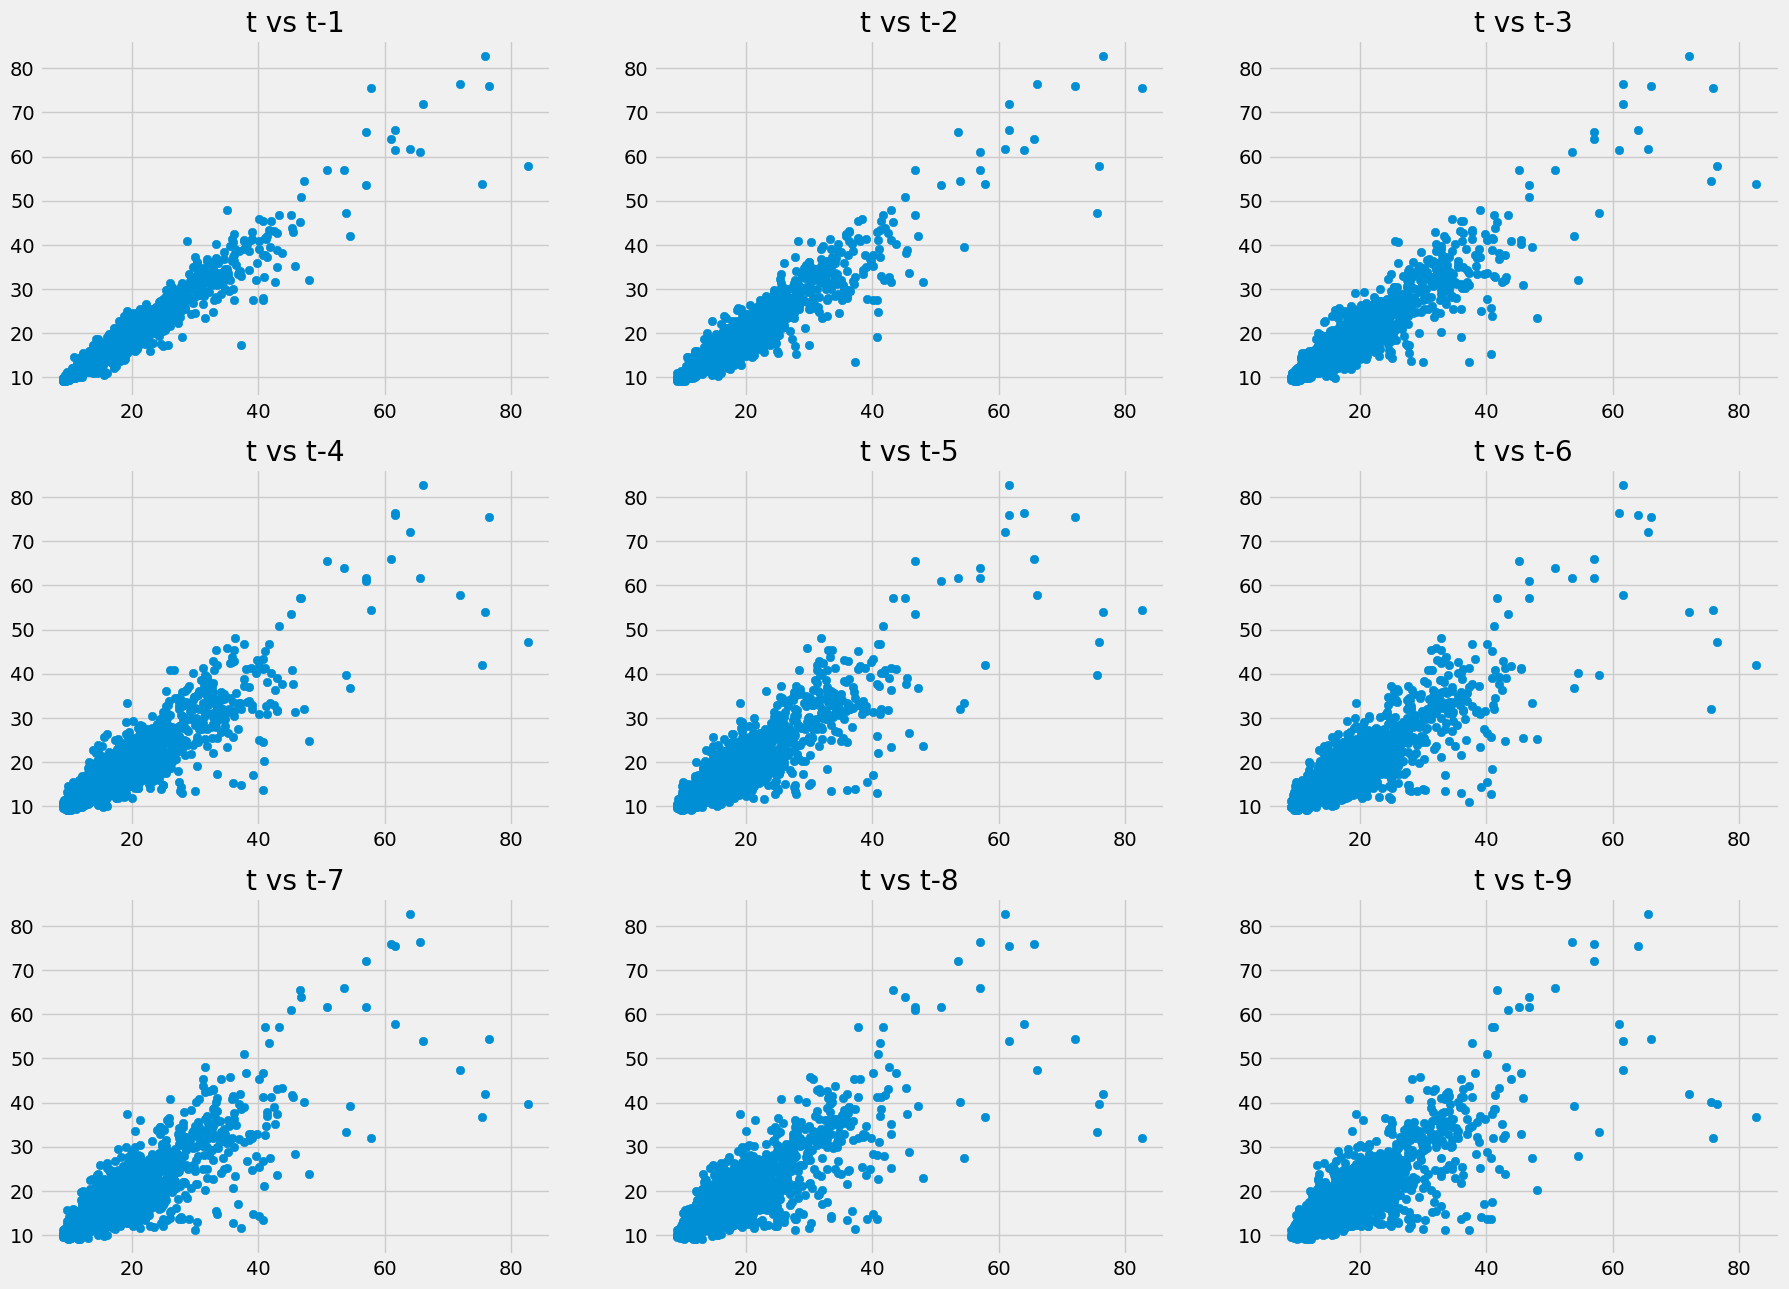

In [481]:
plt.figure(figsize = (20,15))

for i in range(1,(lags + 1)):
    ax = plt.subplot(330 + i)
    ax.set_title('t vs t-' + str(i)) 
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)

plt.show();

The autocorrelation plot below shows this quick drop in correlation and although there are occasional spikes in the curve these are most likely to be when the lag happens to be the distance between two spikes in the index.

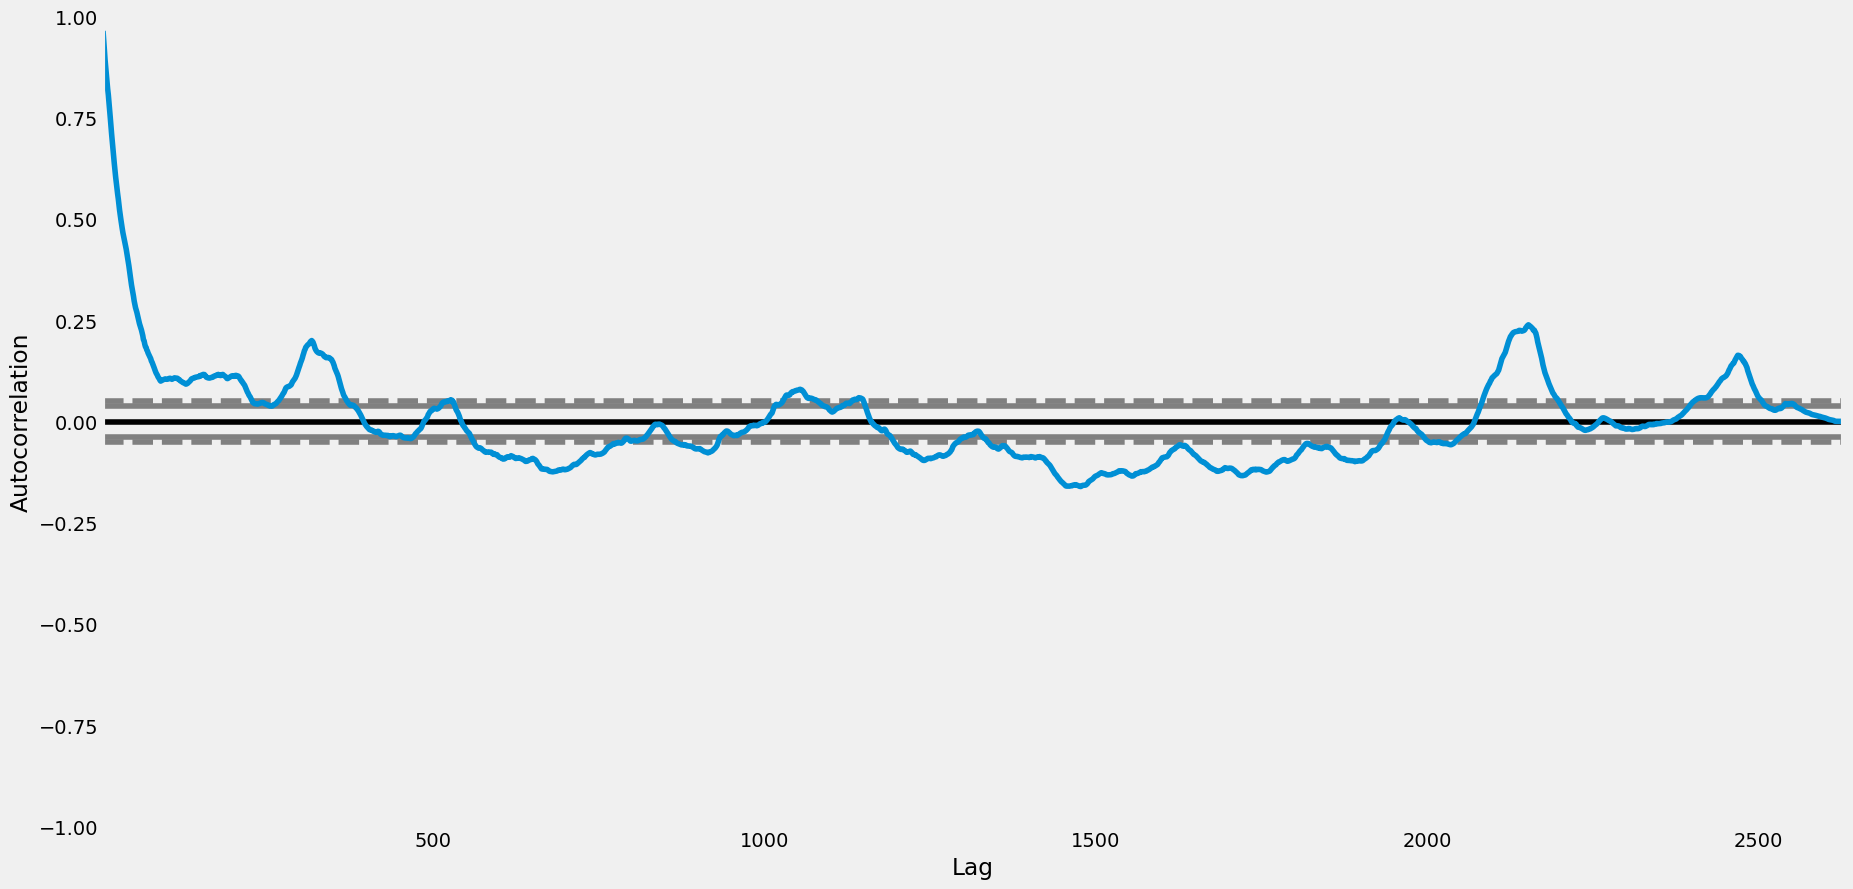

In [482]:
plt.figure(figsize = (20,10))
autocorrelation_plot(df['CLOSE']) 
plt.show()

Below are similar line plots and histograms for sqrt log and Box-Cox transformations

In [483]:
dataframe = pd.DataFrame(df['CLOSE'].values) 
dataframe.columns = ['CLOSE'] 
dataframe['CLOSE'] = np.sqrt(dataframe['CLOSE']) 

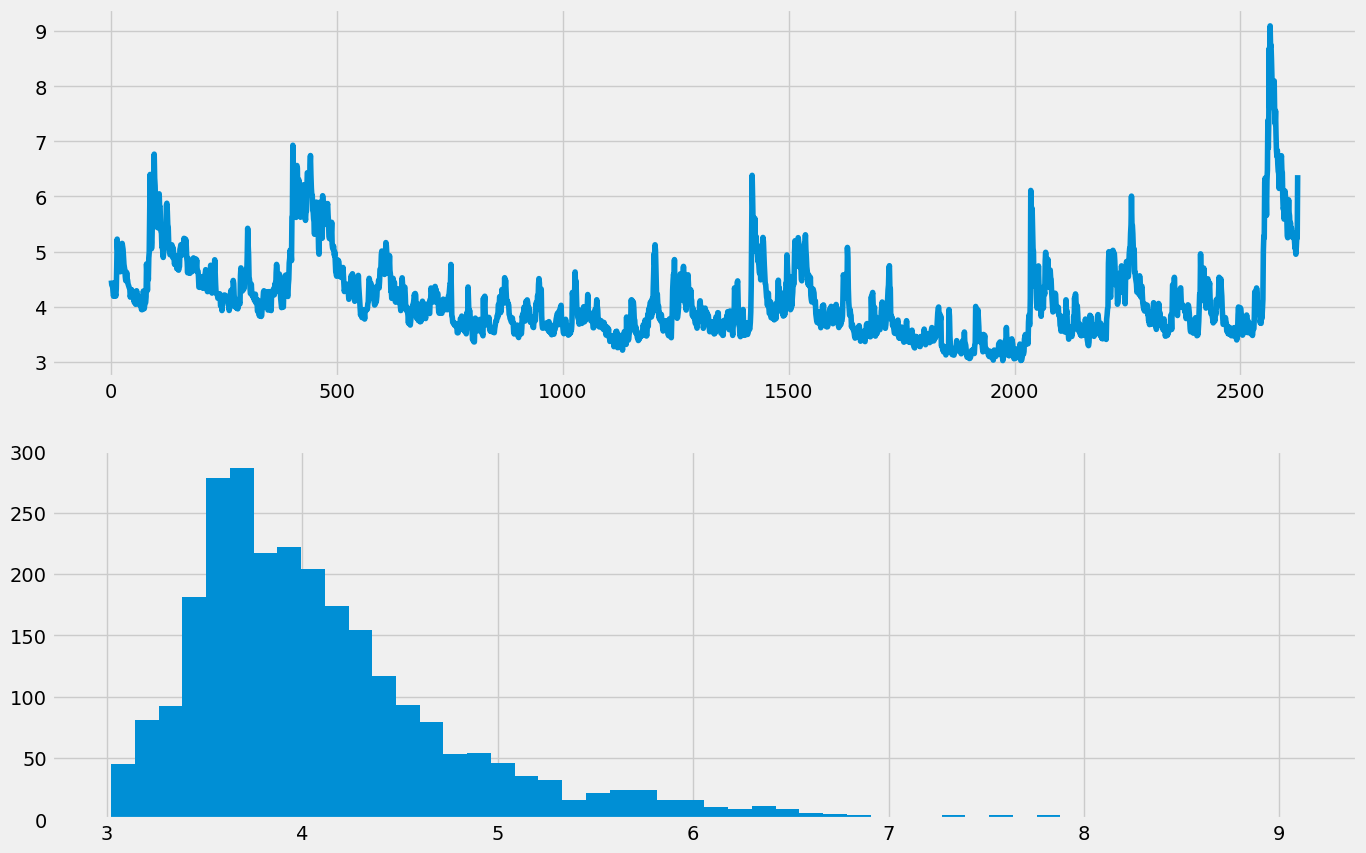

In [484]:
plt.figure(figsize = (15,10)) 
# line plot 
plt.subplot(211) 
plt.plot(dataframe['CLOSE']) 
# histogram 
plt.subplot(212) 
plt.hist(dataframe['CLOSE'],bins=50) 
plt.show()

In [485]:
dataframe = pd.DataFrame(df['CLOSE'].values) 
dataframe.columns = ['CLOSE'] 
dataframe['CLOSE'] = np.log(dataframe['CLOSE']) 

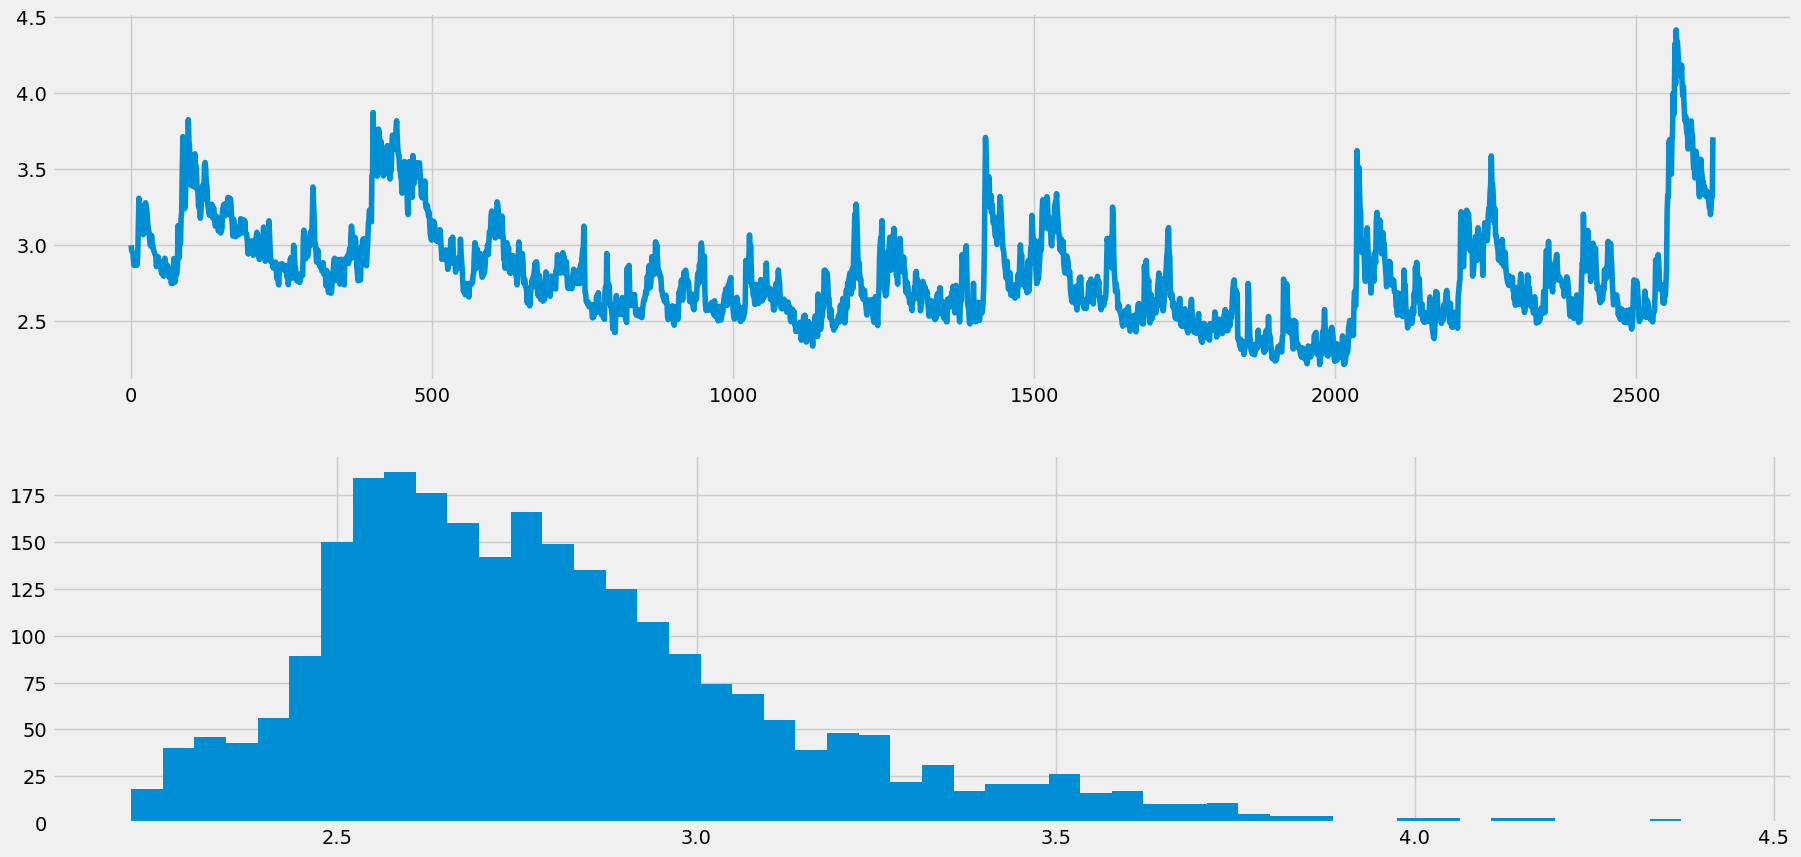

In [486]:
plt.figure(figsize = (20,10)) 
# line plot 
plt.subplot(211)
plt.plot(dataframe['CLOSE']) 
# histogram 
plt.subplot(212) 
plt.hist(dataframe['CLOSE'], bins=50) 
plt.show()

In [487]:
dataframe = pd.DataFrame(df['CLOSE'].values) 
dataframe.columns = ['CLOSE'] 
dataframe['CLOSE'], lam = boxcox(dataframe['CLOSE']) 
print('Lambda: %f' % lam) 

Lambda: -1.122318


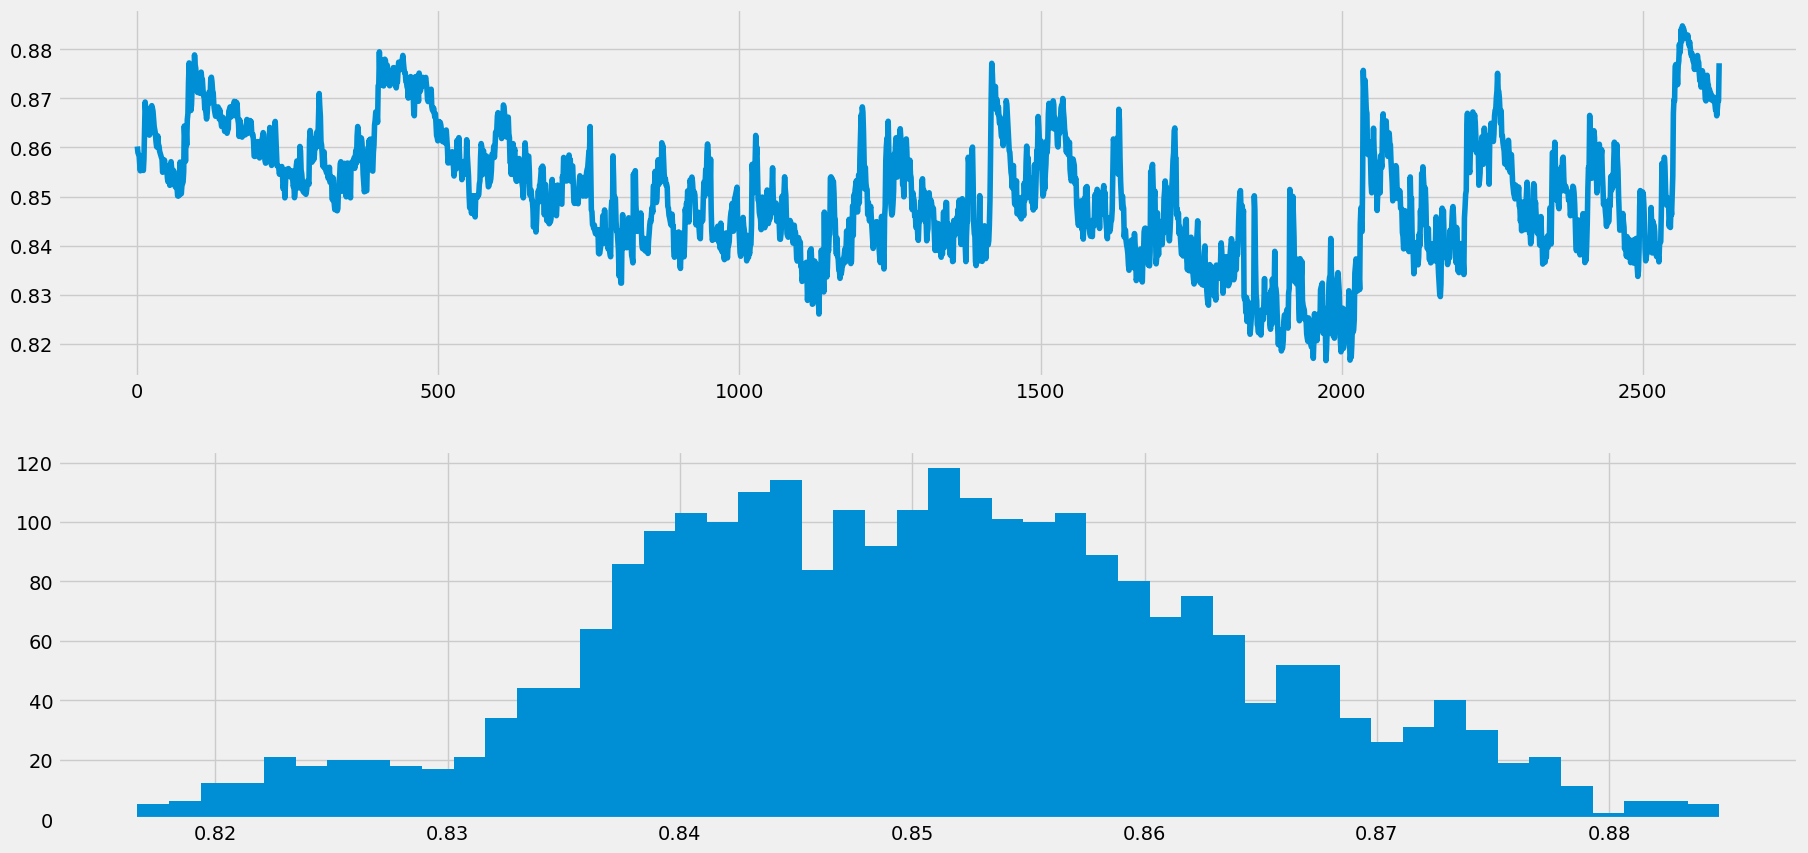

In [488]:
plt.figure(figsize = (20,10)) 
# line plot 
plt.subplot(211) 
plt.plot(dataframe['CLOSE']) 
# histogram 
plt.subplot(212) 
plt.hist(dataframe['CLOSE'], bins=50) 
plt.show()

In [489]:
# statistical test  Null hypothesis is that the series is non-stationary
result = adfuller(df['CLOSE']) 
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:') 

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.210671
p-value: 0.000632
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Based on the results of the AdFuller Test, the null hypothesis of non-stationarity can be rejected in favor of the alternate hypothesis that the series is stationary.

Since the time series is stationary look at the seasonal decomposition (both additive and multiplicative).

In [490]:
type(df['CLOSE'])

pandas.core.series.Series

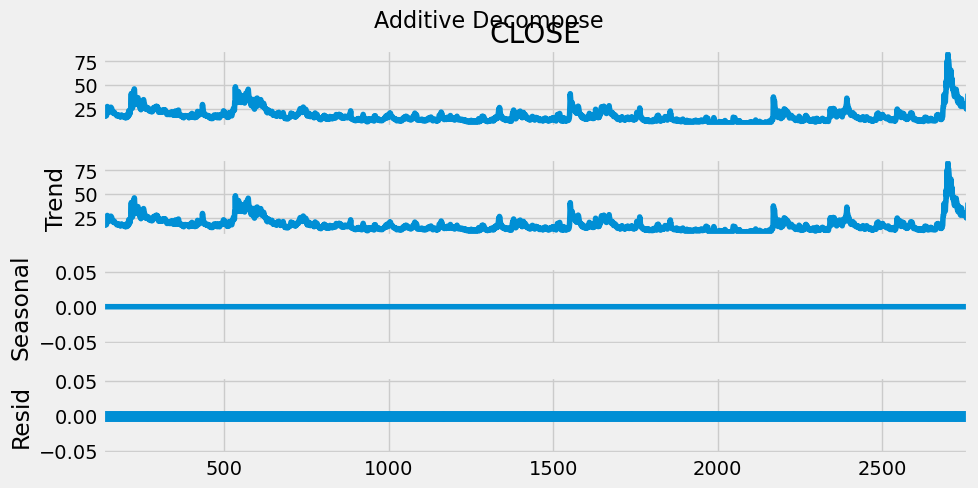

In [491]:
result_add = seasonal_decompose(x=df['CLOSE'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (10,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=16)
plt.show()

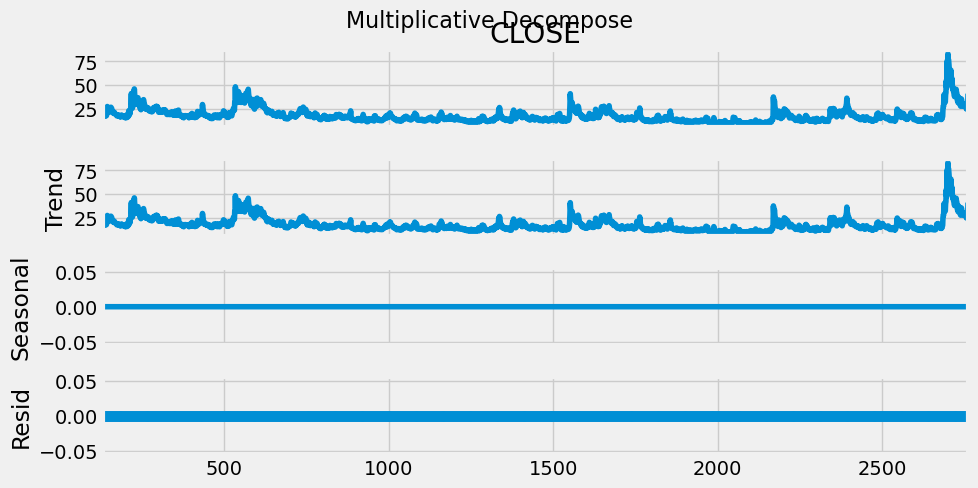

In [492]:
result_mult = seasonal_decompose(x=df['CLOSE'], model='multiplicative', extrapolate_trend='freq', period=int(len(df['CLOSE'])/7))
plt.rcParams.update({'figure.figsize': (10,5)})
result_add.plot().suptitle('Multiplicative Decompose', fontsize=16)
plt.show()

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2628 entries, 133 to 2760
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CLOSE              2628 non-null   float64
 1   Positive           2628 non-null   int64  
 2   Negative           2628 non-null   int64  
 3   Neutral            2628 non-null   int64  
 4   Total              2628 non-null   int64  
 5   summed_vader       2628 non-null   float64
 6   sentiments         2628 non-null   object 
 7   headlines          2628 non-null   object 
 8   stocks             2628 non-null   object 
 9   date               2628 non-null   object 
 10  dayOfWeek          2628 non-null   object 
 11  ave_vader          2628 non-null   float64
 12  daily_sentiment    2628 non-null   object 
 13  compound           2628 non-null   float64
 14  overall_sentiment  2628 non-null   object 
 15  Pos_minus_Neg      2628 non-null   int64  
dtypes: float64(4), int64(5), ob

Add target which is the next day's CLOSE

In [494]:
df['target'] = df.CLOSE.shift(-1)
df.loc[:,'direction'] = [0 if d1>=d2 else 1 for d1,d2 in zip(df.CLOSE,df.target)]
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2627 entries, 133 to 2759
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CLOSE              2627 non-null   float64
 1   Positive           2627 non-null   int64  
 2   Negative           2627 non-null   int64  
 3   Neutral            2627 non-null   int64  
 4   Total              2627 non-null   int64  
 5   summed_vader       2627 non-null   float64
 6   sentiments         2627 non-null   object 
 7   headlines          2627 non-null   object 
 8   stocks             2627 non-null   object 
 9   date               2627 non-null   object 
 10  dayOfWeek          2627 non-null   object 
 11  ave_vader          2627 non-null   float64
 12  daily_sentiment    2627 non-null   object 
 13  compound           2627 non-null   float64
 14  overall_sentiment  2627 non-null   object 
 15  Pos_minus_Neg      2627 non-null   int64  
 16  target             2627 non

In [495]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [496]:
categorical_col = ['sentiments','headlines','stocks','overall_sentiment','dayOfWeek']
numerical_col = ['Positive',
              'Negative', 'Neutral', 'Total','summed_vader','ave_vader','compound']

In [497]:
# pick transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numerical_col)
   ,('categorical', categorical_transformer, categorical_col)
]) 

In [498]:
# Split the data for predicting 'target'
X = df.drop(['direction', 'CLOSE'] ,axis=1) ## obviously ClOSE must be dropped to prevent leakage


# split into train and test sets
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
y_train, y_test = train['target'], test['target']
X_train , X_test = train.drop('target', axis=1), test.drop('target', axis=1)
history =  X_train
predictions = list()

In [499]:
history.shape, y_train.shape

((2101, 15), (2101,))

In [500]:
# RMSE = list()
# for sequence in range(size, X.index.max() + 1):
#         train = X[X.index < sequence]
#         test = X[X.index == sequence]
#         X_train, X_test = train.drop(['target'], axis=1), test.drop(['target'], axis=1)
#         y_train, y_test = train['target'].values, test['target'].values
    
#         pipeline = Pipeline(steps = [
#                ('preprocessor', preprocessor)
#               ,('regressor',LinearRegression())
#            ])
#         pipeline.fit(X_train, y_train)
#         y_pred = pipeline.predict(X_test) 
#         error = mean_squared_error(test['target'].values, y_pred)
#         RMSE.append(error)
# print('Mean RMSE = %.5f' % np.mean(RMSE))

In [501]:
y_test

2234    13.23
2235    12.65
2236    12.93
2237    14.63
2238    13.42
        ...  
2755    24.52
2756    25.81
2757    27.57
2758    27.57
2759    40.79
Name: target, Length: 526, dtype: float64

In [502]:

# walk-forward validation
for t in range(len(test)):
    model = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LinearRegression())
           ])
    model_fit = model.fit(history, y_train)
    output = model_fit.predict(X_test)
    yhat = output[t]
    predictions.append(yhat)
    obs = X_test[t:t+1]
    history = pd.concat([history,obs])
    y_train = pd.concat([y_train, pd.Series(yhat)])
    print("Predicted: ", yhat, "  Observed:  ", y_test[t:t+1].values)
# evaluate forecasts
rmse = np.sqrt(mean_squared_error(X_test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red', alpha=.3)
plt.show()

Predicted:  17.277458809567122   Observed:   [13.23]
Predicted:  16.358234094707342   Observed:   [12.65]
Predicted:  15.803660790747077   Observed:   [12.93]
Predicted:  13.184806510611581   Observed:   [14.63]
Predicted:  12.075498021438193   Observed:   [13.42]
Predicted:  13.08981871791433   Observed:   [13.43]
Predicted:  15.855570927463262   Observed:   [13.42]
Predicted:  13.803081558309733   Observed:   [13.08]
Predicted:  9.757144869033656   Observed:   [13.22]
Predicted:  16.025491991954745   Observed:   [12.58]
Predicted:  16.261245717166457   Observed:   [12.53]
Predicted:  17.735257225860604   Observed:   [13.22]
Predicted:  16.493624179546558   Observed:   [17.02]
Predicted:  16.93882626116493   Observed:   [14.94]


LinAlgError: SVD did not converge in Linear Least Squares

In [503]:
history.shape, y_train.shape

((2115, 15), (2115,))

In [181]:
y_train.info()


<class 'pandas.core.series.Series'>
Index: 2101 entries, 133 to 2233
Series name: target
Non-Null Count  Dtype  
--------------  -----  
2101 non-null   float64
dtypes: float64(1)
memory usage: 97.4 KB


In [32]:

lr_model = pipeline.fit(X_train, y_train) 
predictions = lr_model.predict(X_test)

In [33]:
print(lr_model.score(X,y))
print(lr_model[:-1].get_feature_names_out())
X_tran = preprocessor.fit_transform(X)

0.914961998889954
['numeric__Positive' 'numeric__Negative' 'numeric__Neutral' ...
 'categorical__dayOfWeek_Thursday' 'categorical__dayOfWeek_Tuesday'
 'categorical__dayOfWeek_Wednesday']


In [35]:
X_tran = pd.DataFrame(X_tran)
X_tran.head()

,0,1,2,3,4,5,6,7,8,9,...,7885,7886,7887,7888,7889,7890,7891,7892,7893,7894
0,-2.022083,-0.848555,-1.684460,-1.912535,-0.649845,0.318655,0.199108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-1.451342,-0.873725,-1.619193,-1.716763,-0.027270,2.334948,0.203105,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-1.629698,-0.961819,-1.777699,-1.896661,-0.347415,1.672596,0.202039,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-1.344328,-0.697536,-1.591221,-1.595066,-0.333623,0.875921,0.200174,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-1.522684,-0.735291,-1.544602,-1.637396,-0.571712,0.122639,0.199641,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


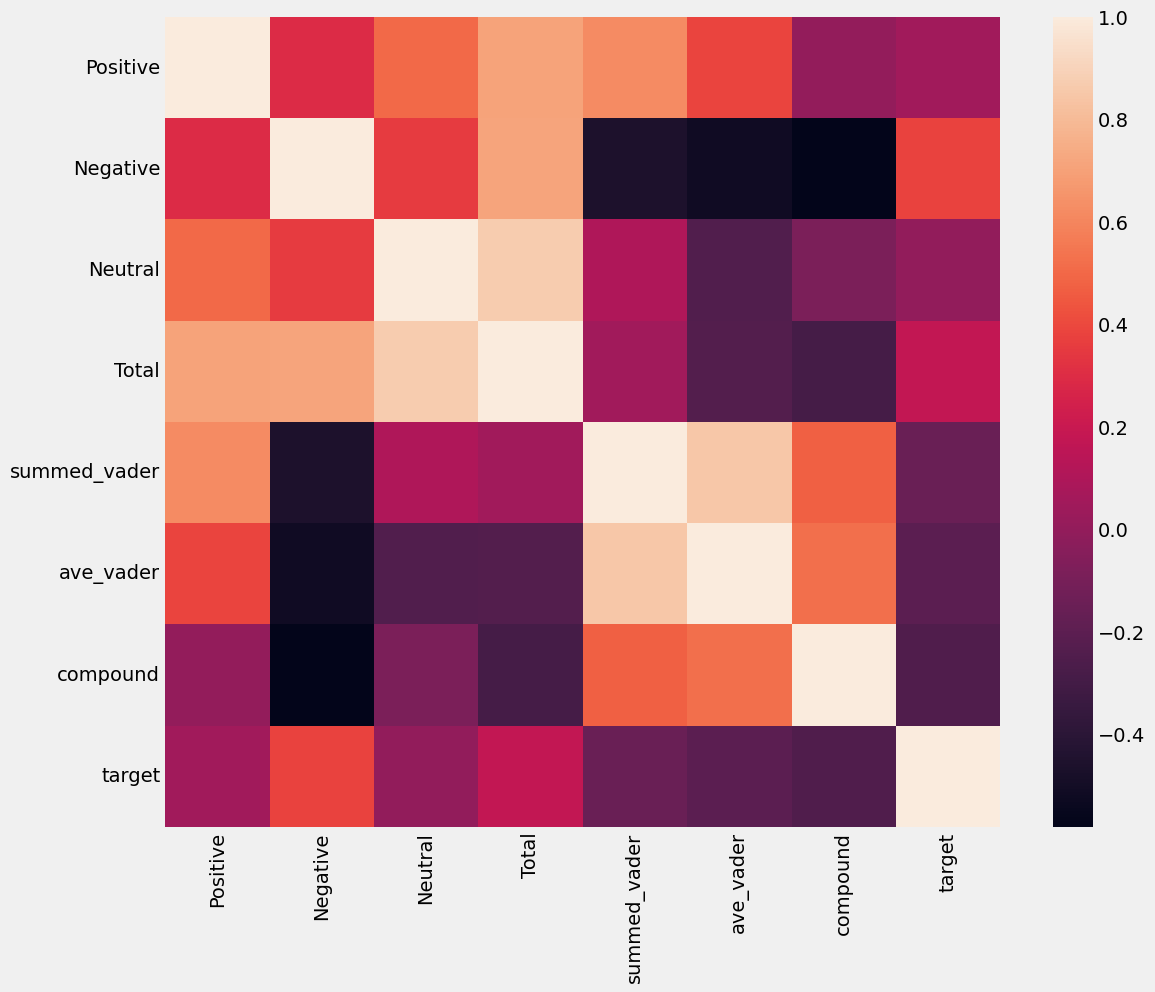

In [37]:

numeric = pd.DataFrame(df[numerical_col])
numeric['target']=df['target']
plt.subplots(figsize=(12,10))
sns.heatmap(numeric.corr());

In [38]:
numeric.corr()

,Positive,Negative,Neutral,Total,summed_vader,ave_vader,compound,target
Positive,1.000000,0.295417,0.502677,0.706124,0.619729,0.383508,0.003106,0.051194
Negative,0.295417,1.000000,0.356781,0.710540,-0.460183,-0.514088,-0.580868,0.381559
Neutral,0.502677,0.356781,1.000000,0.866610,0.103934,-0.244262,-0.085439,-0.004304
Total,0.706124,0.710540,0.866610,1.000000,0.049353,-0.240983,-0.291780,0.173165
summed_vader,0.619729,-0.460183,0.103934,0.049353,1.000000,0.847068,0.469696,-0.152933
ave_vader,0.383508,-0.514088,-0.244262,-0.240983,0.847068,1.000000,0.521843,-0.206853
compound,0.003106,-0.580868,-0.085439,-0.291780,0.469696,0.521843,1.000000,-0.249005
target,0.051194,0.381559,-0.004304,0.173165,-0.152933,-0.206853,-0.249005,1.000000


Most notable is that the positive and neutral counts do not appear to have much relationship to the target while the negative count has the strongest correlation to the target. 

In [39]:
len(predictions)

263

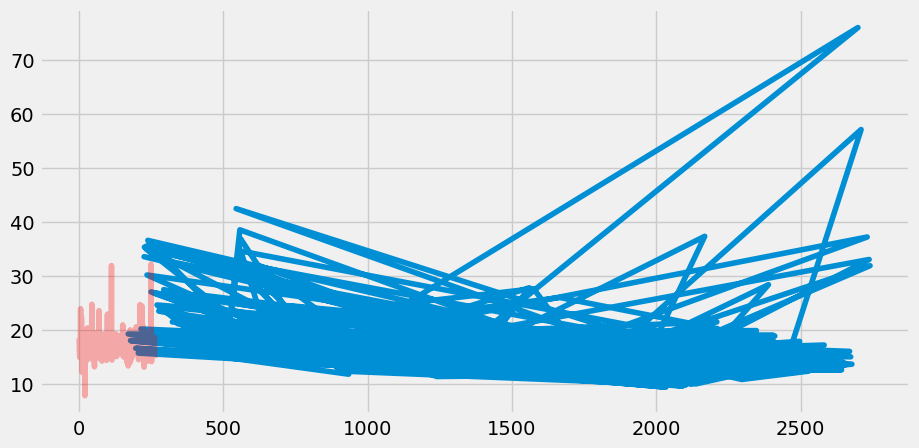

In [63]:
# plot forecasts against actual outcomes
plt.plot(y_test)
plt.plot(predictions, color='red', alpha=.3)
plt.show()

In [40]:
# The coefficients
print("Coefficients: \n", lr_model['regressor'].coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, predictions))

# # Plot outputs
# plt.scatter(X_test, y_test, color="black")
# plt.plot(X_test, predictions, color="blue", linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

Coefficients: 
 [ -5.55508791  -2.1442349  -10.41039354 ...  -0.08003859   0.06536406
   0.37871797]
Mean squared error: 45.38
Coefficient of determination: 0.20


While the linear regression model genertes some results the mse is high and implies an error in prediction of the VIX of around 7 which is huge considering the index is rarely above 25. Similarly, there is massive room for improvement with R<sup>2</sup> of 20%